#GIS_Data_Science
## Assignment: GIS Data Science for Climate in Nepal

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
    --------------------------------------- 0.5/24.5 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 1.0/24.5 MB 3.1 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/24.5 MB 2.2 MB/s eta 0:00:11
   -- ------------------------------------- 1.3/24.5 MB 2.2 MB/s eta 0:00:11
   -- ------------------------------------- 1.3/24.5 MB 2.2 MB/s eta 0:00:11
   -- ------------------------------------- 1.6/24.5 MB 1.2 MB/s eta 0:00:19
   -- ------------------------------------- 1.6/24.5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
#install required libraries 
import pandas as pd 
import numpy as num 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats

In [18]:
#Nepal Map
nepal_map = gpd.read_file(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\Shape_Data\local_unit.shp")
nepal_map = nepal_map.to_crs(epsg=4326)
nepal_map.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [58]:
admin_regions = gpd.read_file(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\nepal_climate_data\nepal_admin_regions.gpkg")
print(admin_regions.head(7))

            name  climate_vulnerability_2020  climate_vulnerability_2050  \
0     Province 1                    0.449816                    0.656665   
1     Province 2                    0.680286                    0.939022   
2        Bagmati                    0.592798                    0.837280   
3        Gandaki                    0.539463                    0.650687   
4        Lumbini                    0.362407                    0.540340   
5        Karnali                    0.362398                    0.525380   
6  Sudurpashchim                    0.323233                    0.408471   

                                            geometry  
0  POLYGON ((87 26.5, 88 27, 87.8 28, 87 28.5, 86...  
1  POLYGON ((85 26.5, 87 26.5, 86.5 27.5, 85 27.2...  
2  POLYGON ((85 27.2, 86.5 27.5, 86.2 28.5, 85 28...  
3  POLYGON ((83.5 27.5, 85 27.2, 85 28.2, 84 29, ...  
4  POLYGON ((82 27, 83.5 27.5, 83.5 28, 82.5 28.2...  
5  POLYGON ((81 28, 82.5 28.2, 83.5 28, 82.5 29.5...  
6  POL

In [59]:
# Extracing relevant columns for bar plot
data = admin_regions.iloc[:, 0:3]
print(data)

            name  climate_vulnerability_2020  climate_vulnerability_2050
0     Province 1                    0.449816                    0.656665
1     Province 2                    0.680286                    0.939022
2        Bagmati                    0.592798                    0.837280
3        Gandaki                    0.539463                    0.650687
4        Lumbini                    0.362407                    0.540340
5        Karnali                    0.362398                    0.525380
6  Sudurpashchim                    0.323233                    0.408471


In [60]:
# melt the Dataframe
data_melted = pd.melt(data, id_vars=['name'], var_name='Year', value_name='Vulnerability')

#displaying the melted data
print(data_melted)

             name                        Year  Vulnerability
0      Province 1  climate_vulnerability_2020       0.449816
1      Province 2  climate_vulnerability_2020       0.680286
2         Bagmati  climate_vulnerability_2020       0.592798
3         Gandaki  climate_vulnerability_2020       0.539463
4         Lumbini  climate_vulnerability_2020       0.362407
5         Karnali  climate_vulnerability_2020       0.362398
6   Sudurpashchim  climate_vulnerability_2020       0.323233
7      Province 1  climate_vulnerability_2050       0.656665
8      Province 2  climate_vulnerability_2050       0.939022
9         Bagmati  climate_vulnerability_2050       0.837280
10        Gandaki  climate_vulnerability_2050       0.650687
11        Lumbini  climate_vulnerability_2050       0.540340
12        Karnali  climate_vulnerability_2050       0.525380
13  Sudurpashchim  climate_vulnerability_2050       0.408471


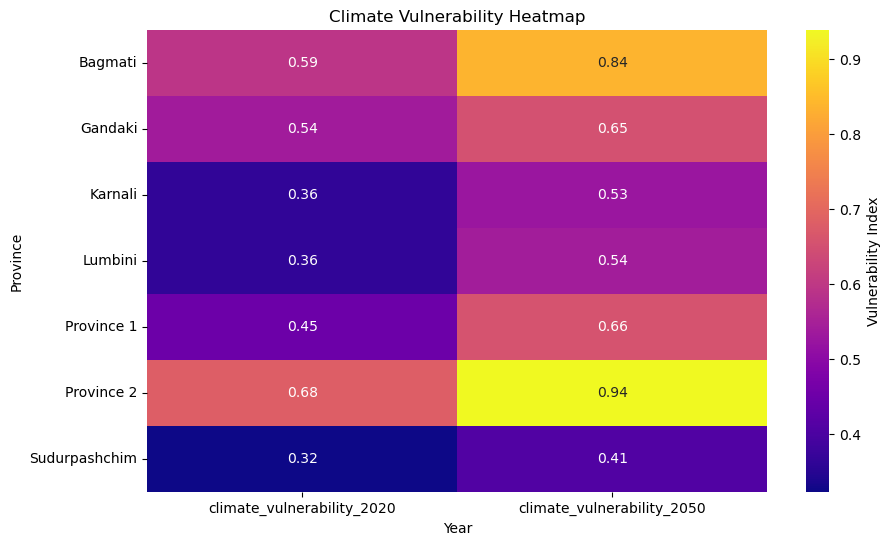

In [64]:
# Pivot the DataFrame for heatmap
pivot_data = data_melted.pivot(index="name", columns="Year", values="Vulnerability")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='plasma', cbar_kws={'label': 'Vulnerability Index'})
plt.title('Climate Vulnerability Heatmap')
plt.xlabel('Year')
plt.ylabel('Province')
plt.show()

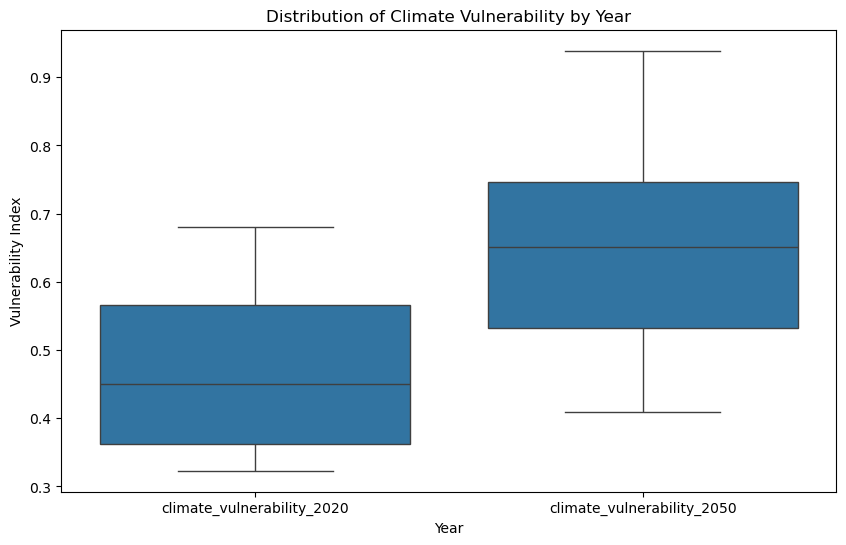

In [65]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Vulnerability', data=data_melted)
plt.title('Distribution of Climate Vulnerability by Year')
plt.xlabel('Year')
plt.ylabel('Vulnerability Index')
plt.show()

#Findings: 
The heatmap visualization reveals a rising trend in climate vulnerability indices from 2020 to 2050 across Nepal’s provinces. Some regions show higher concentrations of vulnerability, particularly in Province 2, while Sudurpashchim remains the least vulnerable but still experiences an increase.

The box plot indicates greater variability in 2050, with a higher median vulnerability index and a wider interquartile range compared to 2020. This suggests that climate impacts are becoming more uneven across provinces, with some experiencing more drastic changes than others.

#Conclusion
Both heatmap and box plot analyses confirm a worsening climate vulnerability trend, with greater disparities among provinces. This underscores the need for region-specific adaptation strategies to address the growing climate risks.

Precipitation Data Analysis

In [ ]:
 #Load Precipitation Data
with rasterio.open(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\nepal_climate_data\nepal_precipitation_2020.tif") as src:
    precipitation_2020 = src.read(1)
    affine_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\nepal_climate_data\nepal_precipitation_2050.tif") as src:
    precipitation_2050 = src.read(1)
    affine_2050 = src.transform  # Extract affine transform

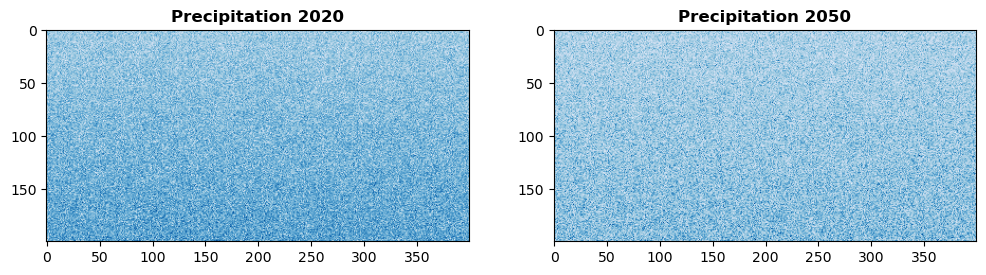

In [21]:
# Visualize precipitation data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
show(precipitation_2020, ax=ax[0], title="Precipitation 2020", cmap="Blues")
show(precipitation_2050, ax=ax[1], title="Precipitation 2050", cmap="Blues")
plt.show()

In [49]:
# Zonal statistics
zs_2020 = zonal_stats(nepal_map, precipitation_2020, affine=affine_2020, nodata=-999,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs_2050 = zonal_stats(nepal_map, precipitation_2050, affine=affine_2050,nodata=-999,  # Pass the affine transform
    stats=["mean", "min", "max"])

In [50]:
# Add zonal stats to the shapefile
nepal_map["mean_precip_2020"] = [x["mean"] for x in zs_2020]
nepal_map["mean_precip_2050"] = [x["mean"] for x in zs_2050]

nepal_map["max_precip_2020"] = [x["max"] for x in zs_2020]
nepal_map["max_precip_2050"] = [x["max"] for x in zs_2050]

nepal_map["min_precip_2020"] = [x["min"] for x in zs_2020]
nepal_map["min_precip_2050"] = [x["min"] for x in zs_2050]

nepal_map.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050',
       'mean_temp_2020', 'mean_temp_2050', 'max_temp_2020', 'max_temp_2050',
       'min_temp_2020', 'min_temp_2050'],
      dtype='object')

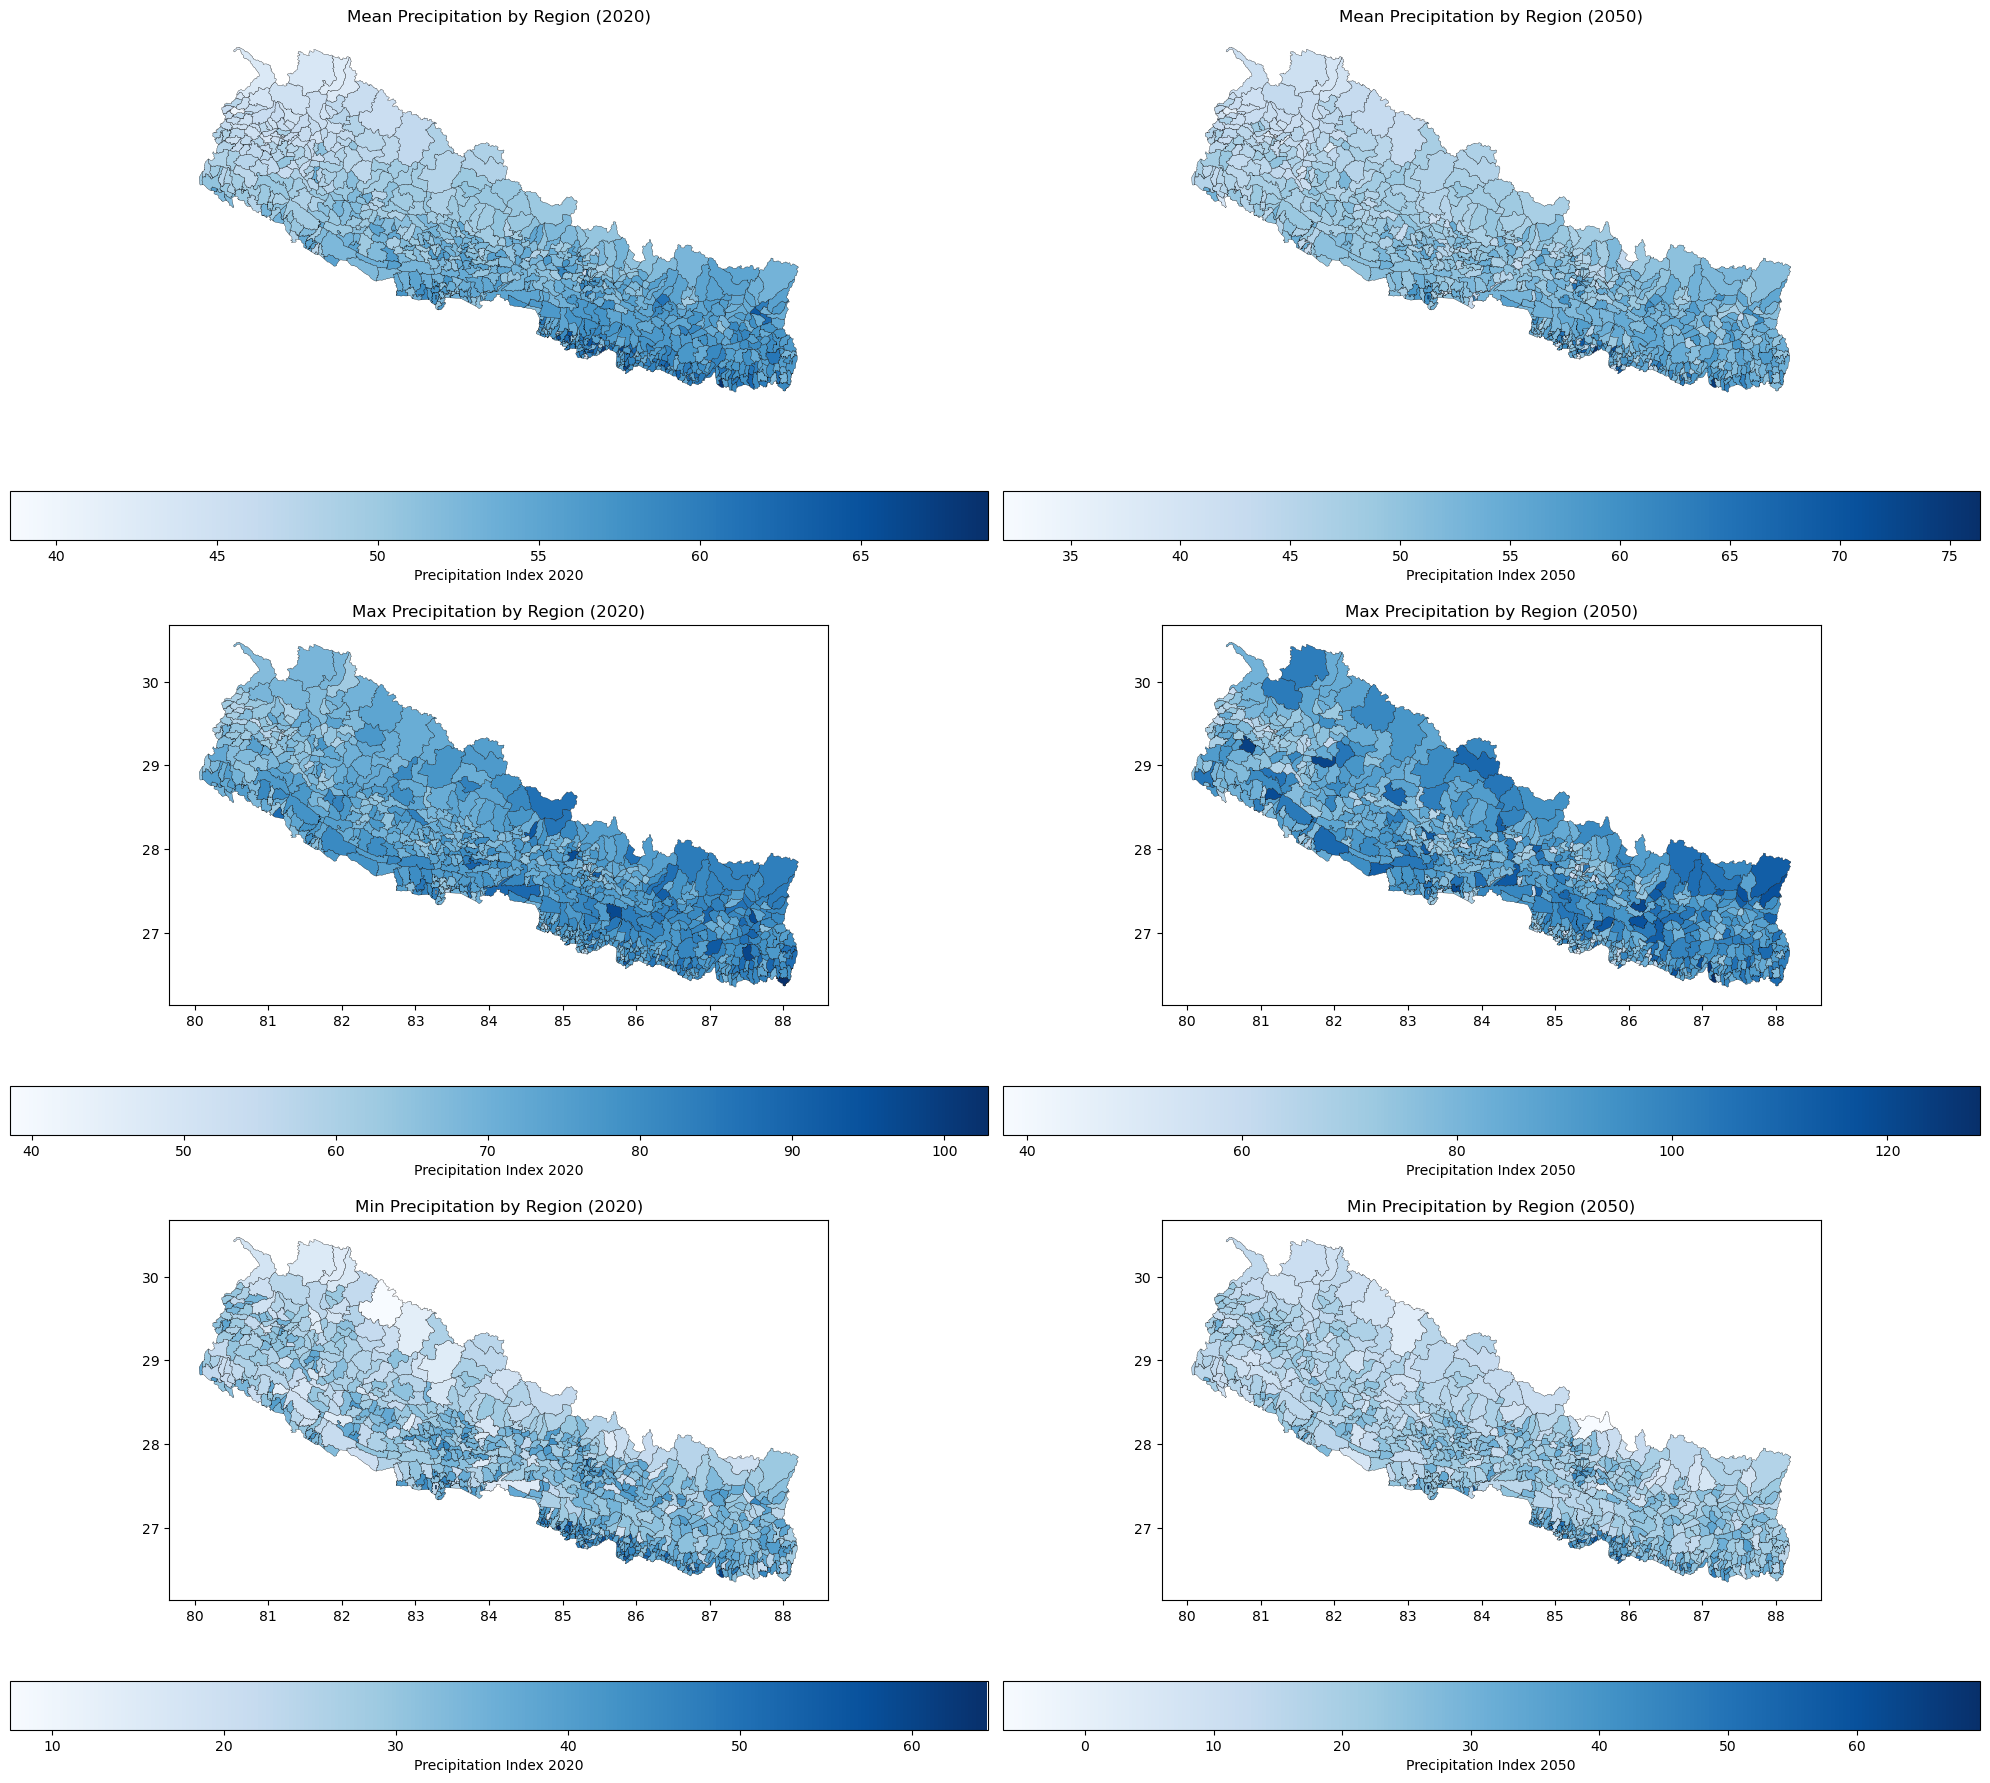

In [55]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal_map.plot(column="mean_precip_2020", ax=ax[0,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Precipitation by Region (2020)")
ax[0,0].set_axis_off()

nepal_map.plot(column="mean_precip_2050", ax=ax[0,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Precipitation by Region (2050)")
ax[0,1].set_axis_off()


nepal_map.plot(column="max_precip_2020", ax=ax[1,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Precipitation by Region (2020)")

nepal_map.plot(column="max_precip_2050", ax=ax[1,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Precipitation by Region (2050)")

nepal_map.plot(column="min_precip_2020", ax=ax[2,0], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Precipitation by Region (2020)")
nepal_map.plot(column="min_precip_2050", ax=ax[2,1], legend=True, cmap="Blues", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Precipitation Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Precipitation by Region (2050)")

plt.tight_layout()
plt.show()

#Finding:
-Mean Precipitation: The eastern region of Nepal, which traditionally receives more rainfall than the west, is expected to experience a notable decline in precipitation between 2020 and 2050.
-Maximum Precipitation: By 2050, peak rainfall levels will increase, particularly in the Himalayan and Terai regions, signaling a higher risk of extreme weather events.
-Minimum Precipitation: Areas with historically low precipitation in 2020 are projected to see an increase, while regions with higher minimum precipitation may experience a decline, suggesting a redistribution of rainfall.
#Conclusion:
Nepal's precipitation trends from 2020 to 2050 suggest a decline in mean rainfall in the east, an increase in extreme rainfall events nationwide, and shifts in minimum precipitation levels. These changes demand proactive strategies in water resource planning, disaster risk reduction, and agricultural adaptation to ensure resilience against evolving climate challenges.



Temperature Data Analysis

In [19]:
#Load Temperature Data
with rasterio.open(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\nepal_climate_data\nepal_temperature_2020.tif") as src:
    temperature_2020 = src.read(1)
    affine2_2020 = src.transform  # Extract affine transform
    meta = src.meta

with rasterio.open(r"D:\Assignment\GIS Data Science1\gis-data-science-assignment-Sabuna-Gamal\Data\nepal_climate_data\nepal_temperature_2050.tif") as src:
    temperature_2050 = src.read(1)
    affine2_2050 = src.transform  # Extract affine transform

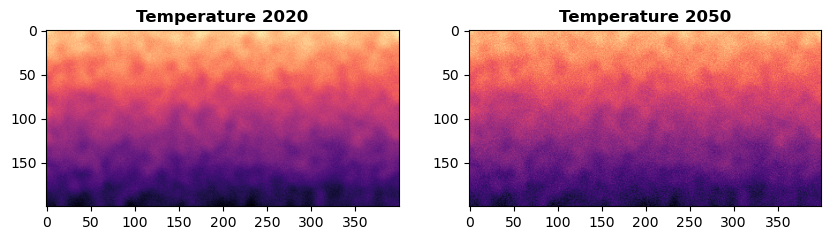

In [31]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
show(temperature_2020, ax=ax[0], title="Temperature 2020", cmap="magma")
show(temperature_2050, ax=ax[1], title="Temperature 2050", cmap="magma")
plt.show()

In [36]:
# Zonal statistics
zs2_2020 = zonal_stats(nepal_map, temperature_2020, affine=affine2_2020,  # Pass the affine transform
    stats=["mean", "min", "max"])
zs2_2050 = zonal_stats(nepal_map, temperature_2050, affine=affine2_2050,  # Pass the affine transform
    stats=["mean", "min", "max"])

In [37]:
# Add zonal stats to the shapefile
nepal_map["mean_temp_2020"] = [x["mean"] for x in zs2_2020]
nepal_map["mean_temp_2050"] = [x["mean"] for x in zs2_2050]

nepal_map["max_temp_2020"] = [x["max"] for x in zs2_2020]
nepal_map["max_temp_2050"] = [x["max"] for x in zs2_2050]

nepal_map["min_temp_2020"] = [x["min"] for x in zs2_2020]
nepal_map["min_temp_2050"] = [x["min"] for x in zs2_2050]

nepal_map.columns

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry', 'mean_precip_2020', 'mean_precip_2050', 'max_precip_2020',
       'max_precip_2050', 'min_precip_2020', 'min_precip_2050',
       'mean_temp_2020', 'mean_temp_2050', 'max_temp_2020', 'max_temp_2050',
       'min_temp_2020', 'min_temp_2050'],
      dtype='object')

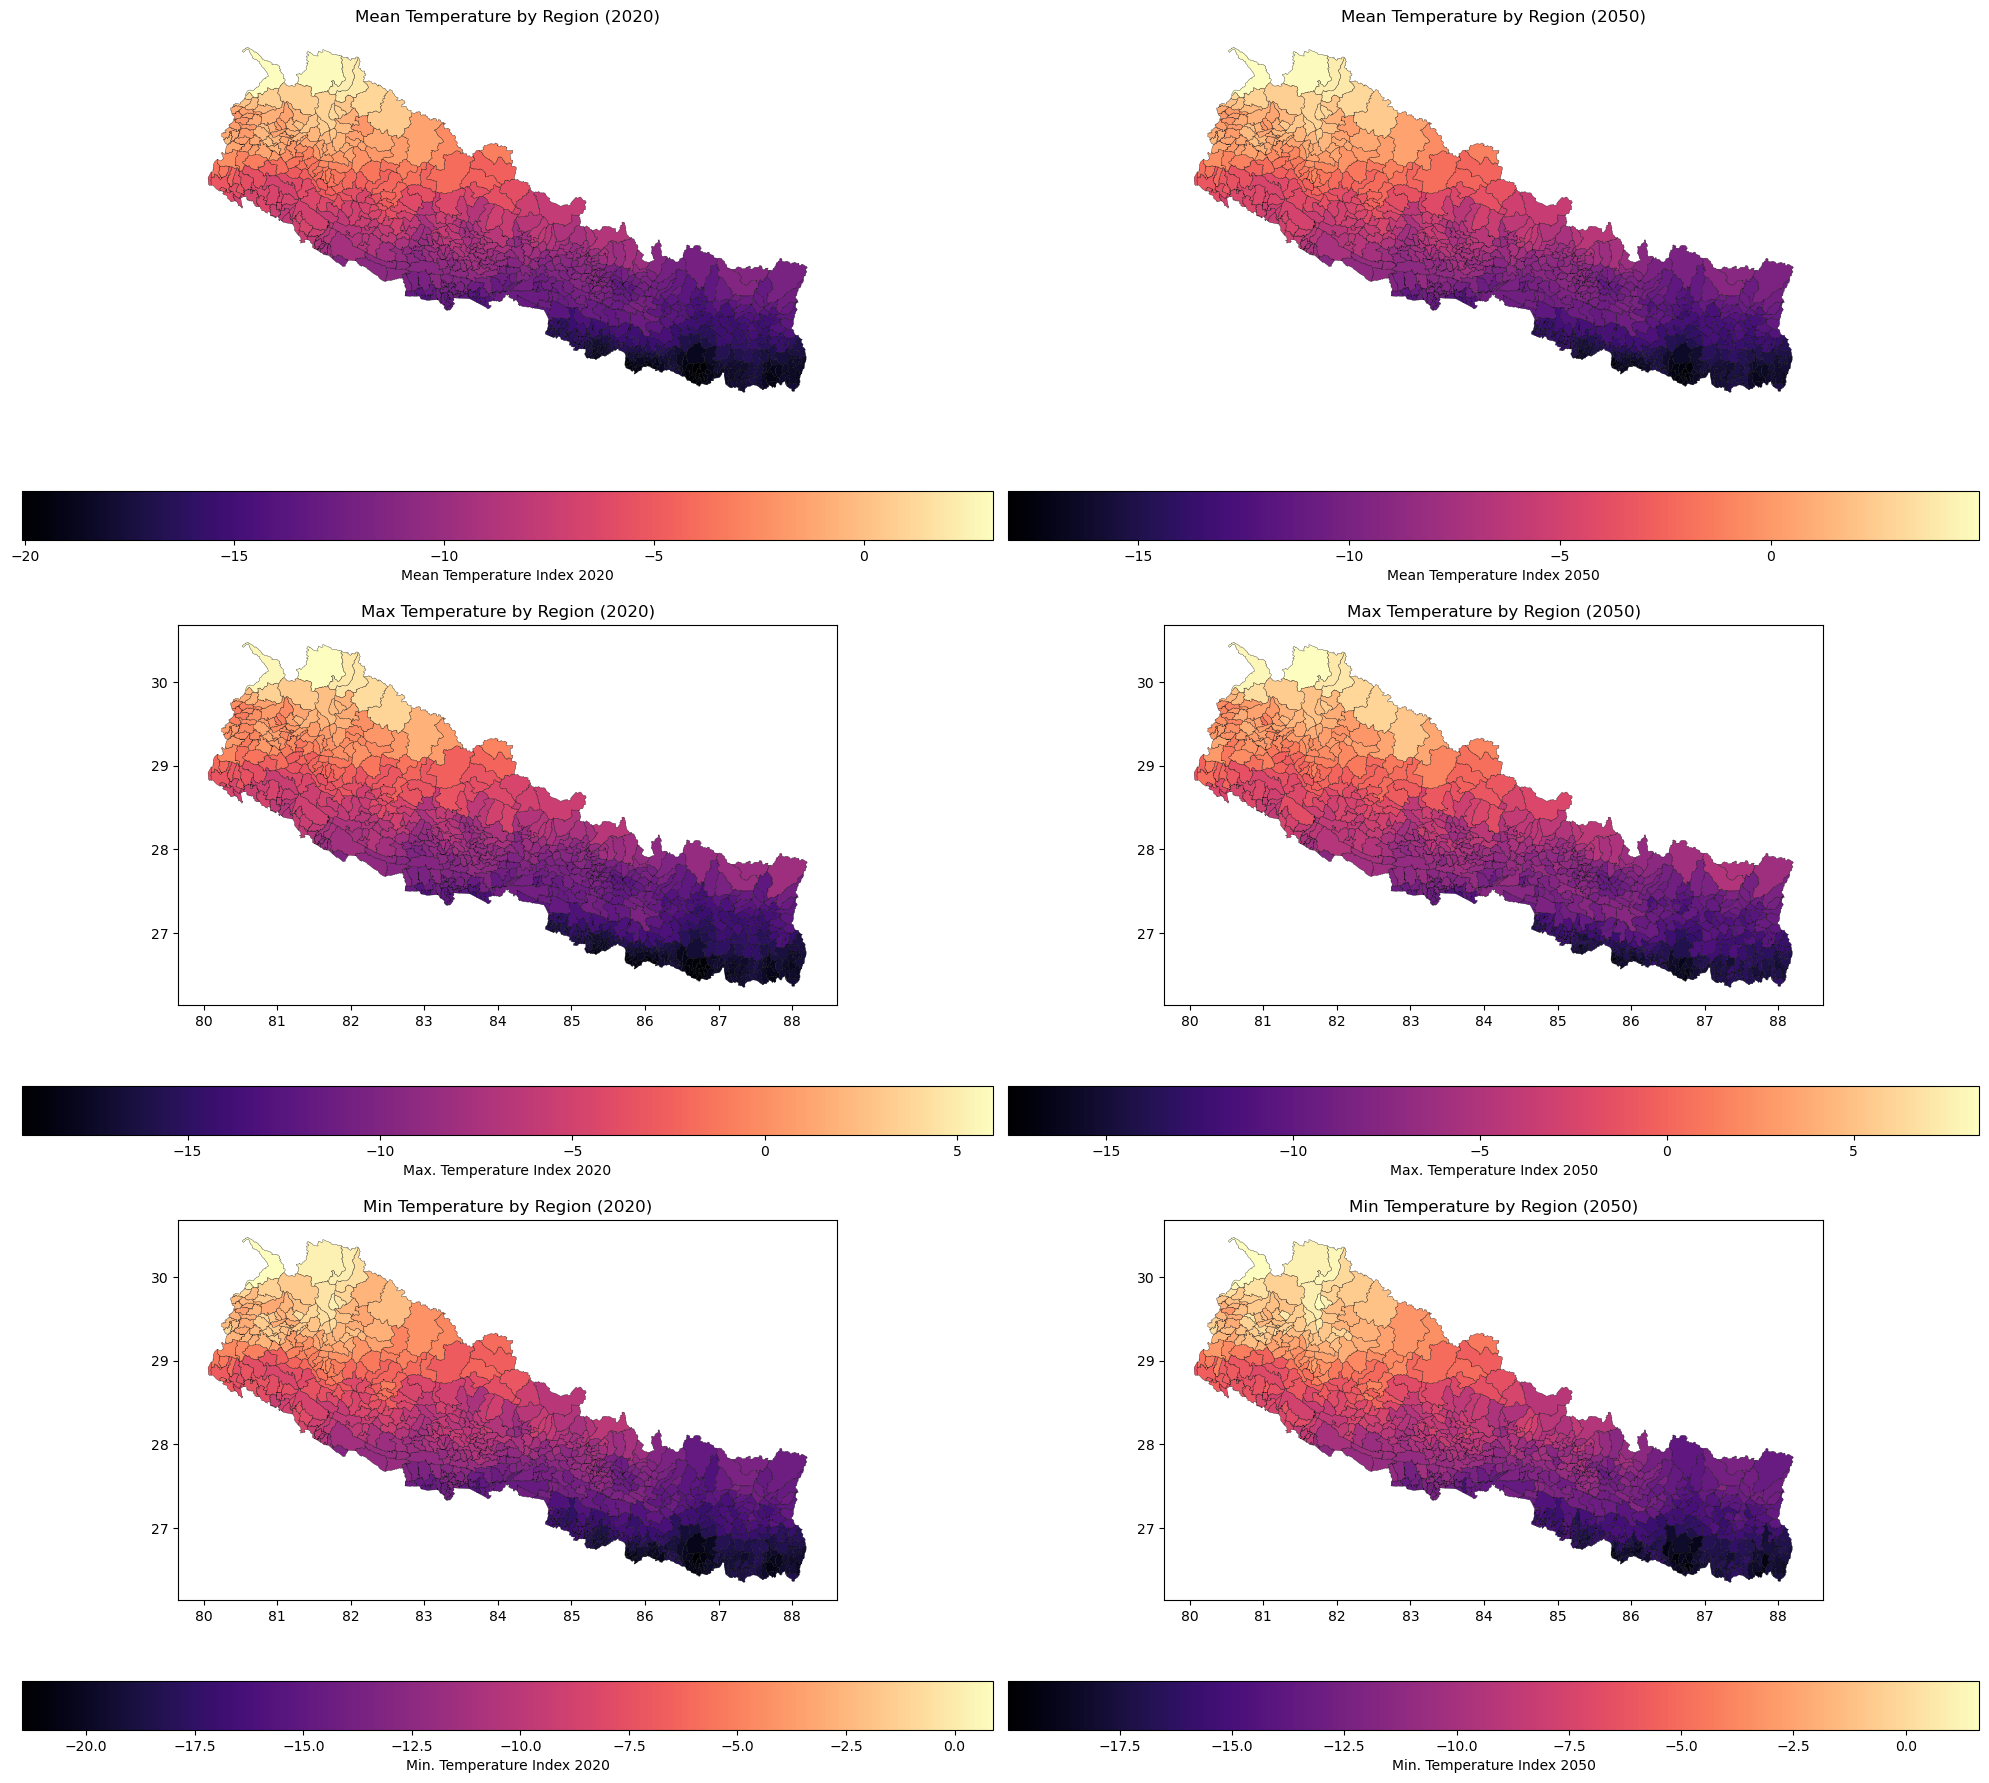

In [41]:
# Visualize regional trends
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
nepal_map.plot(column="mean_temp_2020", ax=ax[0,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2020", 'orientation': "horizontal"})
ax[0,0].set_title("Mean Temperature by Region (2020)")
ax[0,0].set_axis_off()

nepal_map.plot(column="mean_temp_2050", ax=ax[0,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Mean Temperature Index 2050", 'orientation': "horizontal"})
ax[0,1].set_title("Mean Temperature by Region (2050)")
ax[0,1].set_axis_off()


nepal_map.plot(column="max_temp_2020", ax=ax[1,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2020", 'orientation': "horizontal"})
ax[1,0].set_title("Max Temperature by Region (2020)")

nepal_map.plot(column="max_temp_2050", ax=ax[1,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Max. Temperature Index 2050", 'orientation': "horizontal"})
ax[1,1].set_title("Max Temperature by Region (2050)")

nepal_map.plot(column="min_temp_2020", ax=ax[2,0], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2020", 'orientation': "horizontal"})
ax[2,0].set_title("Min Temperature by Region (2020)")
nepal_map.plot(column="min_temp_2050", ax=ax[2,1], legend=True, cmap="magma", edgecolor="black", linewidth=0.2, legend_kwds={'label': "Min. Temperature Index 2050", 'orientation': "horizontal"})
ax[2,1].set_title("Min Temperature by Region (2050)")

plt.tight_layout()
plt.show()

#Finding:
-Rising Mean Temperature: Nepal is experiencing a gradual and consistent increase in average temperatures from 2020 to 2050, aligning with global climate warming trends.
-Stable Maximum Temperature: While peak daytime temperatures have increased slightly, there is no significant rise, indicating that extreme heat events have remained stable over time.
-Increasing Minimum Temperature: A notable rise in nighttime temperatures has been observed,
#Conclusion:
Nepal is experiencing a gradual warming trend, with warmer nights becoming more prevalent from 2020 to 2050. While maximum temperatures have remained relatively stable, the increase in minimum temperatures suggests climate shifts with significant environmental, agricultural, and socio-economic consequences. These trends emphasize the urgent need for climate adaptation policies, sustainable resource management, and proactive mitigation strategies to address the challenges posed by a warming climate.